Počet apartmánů v centru: 337

Superhostové: n = 102
Běžní: n = 235

Superhostové: průměr = 283.27 EUR, SD = 76.56
Běžní: průměr = 269.80 EUR, SD = 75.32
Rozdíl průměrů: 13.47 EUR

--- TEST NORMALITY ---
Superhostové - Shapiro-Wilk: p = 0.0000
Běžní - Shapiro-Wilk: p = 0.0000

Superhostové: šikmost = 1.40, špičatost = 2.65
Běžní: šikmost = 0.95, špičatost = 1.75


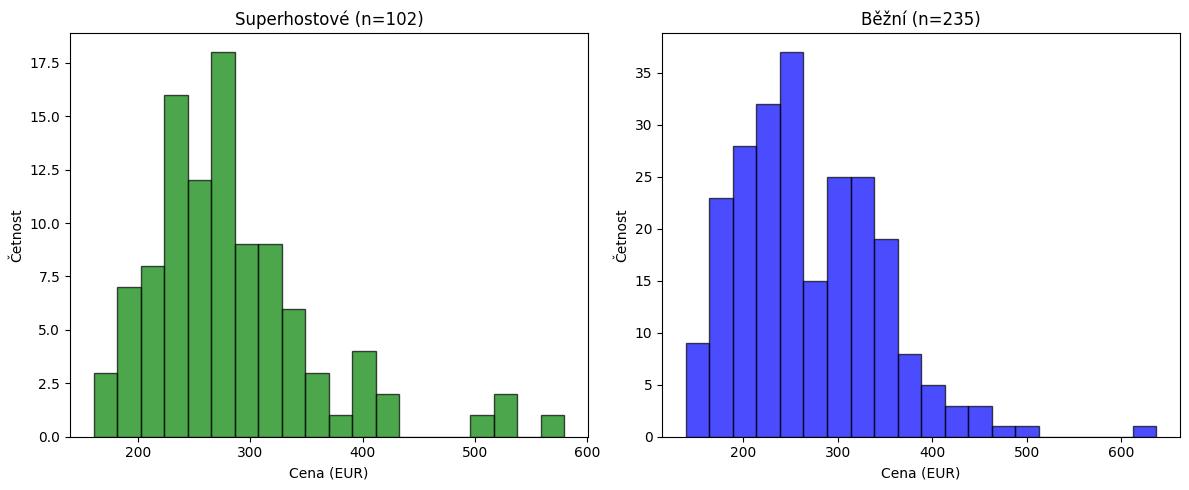


--- VHODNOST T-TESTU ---
✓ T-test je vhodný

--- WELCHŮV T-TEST ---
t = 1.491
p = 0.1377
NEZAMÍTÁME H0: Není významný rozdíl v cenách

--- MANN-WHITNEY U TEST ---
U = 13182.5
p = 0.1452

✓ Oba testy dávají stejný závěr


In [29]:
# ===== T-TEST: SUPERHOSTOVÉ VS. BĚŽNÍ V CENTRU VÍDNĚ =====

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Načtení a filtrování dat
df = pd.read_csv("vienna_weekends.csv", sep=",")
maska = ((df["room_type"] == "Entire home/apt") & 
         (df["dist"] < 2) & 
         (df["person_capacity"] <= 4))
df_centrum = df[maska].copy()
print(f"Počet apartmánů v centru: {len(df_centrum)}")

# Rozdělení na skupiny
super_ceny = df_centrum[df_centrum['host_is_superhost'] == True]['realSum'].dropna()
normal_ceny = df_centrum[df_centrum['host_is_superhost'] == False]['realSum'].dropna()
print(f"\nSuperhostové: n = {len(super_ceny)}")
print(f"Běžní: n = {len(normal_ceny)}")

# Deskriptivní statistiky
print(f"\nSuperhostové: průměr = {super_ceny.mean():.2f} EUR, SD = {super_ceny.std():.2f}")
print(f"Běžní: průměr = {normal_ceny.mean():.2f} EUR, SD = {normal_ceny.std():.2f}")
print(f"Rozdíl průměrů: {super_ceny.mean() - normal_ceny.mean():.2f} EUR")

# Test normality
print("\n--- TEST NORMALITY ---")
if len(super_ceny) < 5000:
    stat_super, p_super = stats.shapiro(super_ceny)
    print(f"Superhostové - Shapiro-Wilk: p = {p_super:.4f}")

if len(normal_ceny) < 5000:
    stat_normal, p_normal = stats.shapiro(normal_ceny)
    print(f"Běžní - Shapiro-Wilk: p = {p_normal:.4f}")

print(f"\nSuperhostové: šikmost = {stats.skew(super_ceny):.2f}, špičatost = {stats.kurtosis(super_ceny):.2f}")
print(f"Běžní: šikmost = {stats.skew(normal_ceny):.2f}, špičatost = {stats.kurtosis(normal_ceny):.2f}")

# Vizualizace
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(super_ceny, bins=20, alpha=0.7, edgecolor='black', color='green')
axes[0].set_title(f'Superhostové (n={len(super_ceny)})')
axes[0].set_xlabel('Cena (EUR)')
axes[0].set_ylabel('Četnost')

axes[1].hist(normal_ceny, bins=20, alpha=0.7, edgecolor='black', color='blue')
axes[1].set_title(f'Běžní (n={len(normal_ceny)})')
axes[1].set_xlabel('Cena (EUR)')
axes[1].set_ylabel('Četnost')

plt.tight_layout()
plt.show()

# Rozhodnutí o vhodnosti t-testu
print("\n--- VHODNOST T-TESTU ---")
if (p_super < 0.05 or p_normal < 0.05) and (len(super_ceny) < 30 or len(normal_ceny) < 30):
    print("⚠️ Data nejsou normální a n < 30")
    print("Doporučení: Použijte Mann-Whitney U test")
elif abs(stats.skew(super_ceny)) > 2 or abs(stats.skew(normal_ceny)) > 2:
    print("⚠️ Extrémní šikmost")
    print("Doporučení: Zvažte transformaci dat")
else:
    print("✓ T-test je vhodný")

# Welchův t-test
print("\n--- WELCHŮV T-TEST ---")
t_stat, p_value = stats.ttest_ind(super_ceny, normal_ceny, equal_var=False)
print(f"t = {t_stat:.3f}")
print(f"p = {p_value:.4f}")

if p_value < 0.05:
    print("ZAMÍTÁME H0: Superhostové účtují významně jiné ceny")
    if super_ceny.mean() > normal_ceny.mean():
        print(f"Superhostové účtují v průměru o {super_ceny.mean() - normal_ceny.mean():.2f} EUR více")
    else:
        print(f"Superhostové účtují v průměru o {normal_ceny.mean() - super_ceny.mean():.2f} EUR méně")
else:
    print("NEZAMÍTÁME H0: Není významný rozdíl v cenách")

# Mann-Whitney U test pro srovnání
print("\n--- MANN-WHITNEY U TEST ---")
u_stat, p_mw = stats.mannwhitneyu(super_ceny, normal_ceny, alternative='two-sided')
print(f"U = {u_stat:.1f}")
print(f"p = {p_mw:.4f}")

if (p_value < 0.05) == (p_mw < 0.05):
    print("\n✓ Oba testy dávají stejný závěr")
else:
    print("\n⚠️ Testy se neshodují - data pravděpodobně porušují předpoklady")

In [24]:
# ===== ČESTNÝ PŘÍSTUP K T-TESTU =====

import pandas as pd
from scipy import stats

df = pd.read_csv("vienna_weekends.csv", sep=",")

print("=== ANALÝZA 1: VŠECHNA DATA ===")
super_prices = df[df['host_is_superhost'] == True]['realSum']
normal_prices = df[df['host_is_superhost'] == False]['realSum']

t_stat, p_value = stats.ttest_ind(super_prices, normal_prices, equal_var=False)
print(f"Welchův t-test: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Průměry: {super_prices.mean():.2f} vs {normal_prices.mean():.2f}")

print("\n=== ANALÝZA 2: SENZITIVITA (bez top 5%) ===")
q95 = df['realSum'].quantile(0.95)
df_trim = df[df['realSum'] <= q95]
super_trim = df_trim[df_trim['host_is_superhost'] == True]['realSum']
normal_trim = df_trim[df_trim['host_is_superhost'] == False]['realSum']

t_stat2, p_value2 = stats.ttest_ind(super_trim, normal_trim, equal_var=False)
print(f"Welchův t-test: t = {t_stat2:.3f}, p = {p_value2:.4f}")
print(f"Odstraněno: {len(df) - len(df_trim)} záznamů ({(1 - len(df_trim)/len(df))*100:.1f}%)")

print("\n=== ZÁVĚR ===")
if (p_value < 0.05) == (p_value2 < 0.05):
    print("✓ Závěr je stejný s i bez outlierů - výsledek je robustní")
else:
    print("⚠ Závěr se mění - výsledek závisí na outlierech")

# NEPARAMETRICKÝ TEST PRO SROVNÁNÍ
u_stat, p_mw = stats.mannwhitneyu(super_prices, normal_prices)
print(f"\nMann-Whitney (neparametrický): p = {p_mw:.4f}")

=== ANALÝZA 1: VŠECHNA DATA ===
Welchův t-test: t = -0.400, p = 0.6893
Průměry: 239.38 vs 244.02

=== ANALÝZA 2: SENZITIVITA (bez top 5%) ===
Welchův t-test: t = 2.634, p = 0.0086
Odstraněno: 90 záznamů (5.0%)

=== ZÁVĚR ===
⚠ Závěr se mění - výsledek závisí na outlierech

Mann-Whitney (neparametrický): p = 0.0189
